# Importing Libraries

In [222]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# Customer Dataset

In [223]:
cutomerdata_filepath = r'C:\Users\Asus\Documents\Internship\classification final\classification\custmer-segmentation\custmer-segmentation\Customerdata_Train.xlsx'

In [224]:
customerdata = pd.read_excel(cutomerdata_filepath)

In [225]:
customerdata.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [226]:
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [227]:
customerdata.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615
std,0.473580,0.292821,0.190268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [228]:
customerdata.describe(include='O')

,CustomerID,City,PreferredDeliveryDay
count,23820,23820,23820
unique,23820,4,7
top,C16368,CITY4,Tuesday
freq,1,9143,5343


In [229]:
for i in customerdata:
  print('\n',"************",i,"**************",'\n',customerdata[i].unique())


 ************ CustomerID ************** 
 ['C16368' 'C20345' 'C17683' ... 'C40967' 'C36140' 'C42003']

 ************ City ************** 
 ['CITY2' 'CITY4' 'CITY3' 'CITY1']

 ************ DateOfRegistration ************** 
 ['2012-09-28T00:00:00.000000000' '2010-12-19T00:00:00.000000000'
 '2010-10-03T00:00:00.000000000' ... '2018-01-14T00:00:00.000000000'
 '2018-01-13T00:00:00.000000000' '2018-01-17T00:00:00.000000000']

 ************ OnlineCommunication ************** 
 [0 1]

 ************ AutomaticRefill ************** 
 [0 1]

 ************ DoorstepDelivery ************** 
 [0 1]

 ************ PreferredDeliveryDay ************** 
 ['Monday' 'Friday' 'Wednesday' 'Tuesday' 'Thursday' 'Sunday' 'Saturday']


In [230]:
for i in customerdata:
  print('\n',"************",i,"**************",'\n',customerdata[i].nunique())


 ************ CustomerID ************** 
 23820

 ************ City ************** 
 4

 ************ DateOfRegistration ************** 
 2673

 ************ OnlineCommunication ************** 
 2

 ************ AutomaticRefill ************** 
 2

 ************ DoorstepDelivery ************** 
 2

 ************ PreferredDeliveryDay ************** 
 7


In [231]:
unique_values = customerdata['DateOfRegistration'].unique()

for value in unique_values:
    print(value)

2012-09-28T00:00:00.000000000
2010-12-19T00:00:00.000000000
2010-10-03T00:00:00.000000000
2010-11-27T00:00:00.000000000
2009-12-04T00:00:00.000000000
2010-12-29T00:00:00.000000000
2010-09-22T00:00:00.000000000
2009-11-16T00:00:00.000000000
2009-07-25T00:00:00.000000000
2010-03-14T00:00:00.000000000
2011-04-11T00:00:00.000000000
2011-03-08T00:00:00.000000000
2010-08-30T00:00:00.000000000
2011-02-02T00:00:00.000000000
2010-09-14T00:00:00.000000000
2011-02-22T00:00:00.000000000
2010-12-18T00:00:00.000000000
2010-08-12T00:00:00.000000000
2011-03-10T00:00:00.000000000
2011-01-26T00:00:00.000000000
2009-07-24T00:00:00.000000000
2010-08-28T00:00:00.000000000
2011-01-29T00:00:00.000000000
2011-03-07T00:00:00.000000000
2009-04-24T00:00:00.000000000
2010-05-18T00:00:00.000000000
2010-09-13T00:00:00.000000000
2011-04-22T00:00:00.000000000
2010-08-20T00:00:00.000000000
2011-01-04T00:00:00.000000000
2009-11-10T00:00:00.000000000
2009-06-20T00:00:00.000000000
2010-01-26T00:00:00.000000000
2010-02-26

In [232]:
# convert the date_of_email column to a datetime format
customerdata['DateOfRegistration'] = pd.to_datetime(customerdata['DateOfRegistration'])

# get the minimum and maximum dates
min_date1 = customerdata['DateOfRegistration'].min()
max_date1 = customerdata['DateOfRegistration'].max()

In [233]:
print(min_date1)
print(max_date1)

2008-06-17 00:00:00
2018-01-17 00:00:00


In [234]:

# convert the DateOfIncident column to string
customerdata['DateOfRegistration'] = customerdata['DateOfRegistration'].astype(str)


# apply strptime() to each string in the DateOfIncident column
customerdata['DateOfRegistration'] = customerdata['DateOfRegistration'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the month day year values from the datetime objects in the DateOfIncident column
customerdata['DateOfRegistration_Year'] = customerdata['DateOfRegistration'].apply(lambda x: x.year)
customerdata['DateOfRegistration_Month'] = customerdata['DateOfRegistration'].apply(lambda x: x.month)
customerdata['DateOfRegistration_Day'] = customerdata['DateOfRegistration'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
customerdata.head()


,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012,9,28
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010,12,19
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010,10,3
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010,11,27
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009,12,4


In [235]:
for i in customerdata:
  print('\n',"************",i,"**************",'\n',customerdata[i].nunique())


 ************ CustomerID ************** 
 23820

 ************ City ************** 
 4

 ************ DateOfRegistration ************** 
 2673

 ************ OnlineCommunication ************** 
 2

 ************ AutomaticRefill ************** 
 2

 ************ DoorstepDelivery ************** 
 2

 ************ PreferredDeliveryDay ************** 
 7

 ************ DateOfRegistration_Year ************** 
 11

 ************ DateOfRegistration_Month ************** 
 12

 ************ DateOfRegistration_Day ************** 
 31


In [236]:
#customerdata['date'] = pd.to_datetime(customerdata['DateOfRegistration_Year'].astype(str) + '-' + customerdata['DateOfRegistration_Month'].astype(str) + '-' + customerdata['DateOfRegistration_Day'].astype(str))
customerdata['month_name'] = pd.to_datetime(customerdata['DateOfRegistration_Month'], format='%m').dt.month_name().str.slice(stop=3)

In [237]:
customerdata.isnull().sum()

CustomerID                  0
City                        0
DateOfRegistration          0
OnlineCommunication         0
AutomaticRefill             0
DoorstepDelivery            0
PreferredDeliveryDay        0
DateOfRegistration_Year     0
DateOfRegistration_Month    0
DateOfRegistration_Day      0
month_name                  0
dtype: int64

# Email Dataset

In [238]:
emaildata_filepath = r'C:\Users\Asus\Documents\Internship\classification final\classification\custmer-segmentation\custmer-segmentation\Emaildata_Train.xlsx'

In [239]:
emaildata = pd.read_excel(emaildata_filepath)

In [240]:
emaildata.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [241]:
emaildata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [242]:
emaildata.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,517672,517672,517672,517672,517672,517672
unique,23820,3382,2,14369,2,3
top,C41705,2013-10-11,CustomizedEmail,15:14:02,no,no
freq,292,2139,493852,64,369812,466011


In [243]:
for i in emaildata:
  print('\n',"************",i,"**************",'\n',emaildata[i].unique())


 ************ CustomerID ************** 
 ['C16368' 'C20345' 'C17683' ... 'C40967' 'C36140' 'C42003']

 ************ DateOfemail ************** 
 ['2012-09-28' '2010-12-19' '2010-10-03' ... '2014-02-02' '2014-07-03'
 '2018-01-21']

 ************ EmailType ************** 
 ['WelcomeEmail' 'CustomizedEmail']

 ************ timestamp ************** 
 ['15:56:50' '15:10:30' '17:12:24' ... '16:09:12' '11:31:46' '12:19:40']

 ************ MailOpened ************** 
 ['yes' 'no']

 ************ MailClicked ************** 
 ['NotApplicable' 'no' 'yes']


In [244]:
for i in emaildata:
  print('\n',"************",i,"**************",'\n',emaildata[i].nunique())


 ************ CustomerID ************** 
 23820

 ************ DateOfemail ************** 
 3382

 ************ EmailType ************** 
 2

 ************ timestamp ************** 
 14369

 ************ MailOpened ************** 
 2

 ************ MailClicked ************** 
 3


In [245]:
# convert the date_of_email column to a datetime format
emaildata['DateOfemail'] = pd.to_datetime(emaildata['DateOfemail'])

# get the minimum and maximum dates
min_date = emaildata['DateOfemail'].min()
max_date = emaildata['DateOfemail'].max()


In [246]:
print(min_date)
print(max_date)

2008-06-17 00:00:00
2018-01-21 00:00:00


In [247]:
customized_emails = emaildata[emaildata['EmailType'] == 'CustomizedEmail']
num_customized_emails = pd.DataFrame(customized_emails.groupby('CustomerID')['EmailType'].count())


num_customized_emails.head(10)


,EmailType
CustomerID,
C12116,31
C12119,41
C12122,45
C12123,28
C12124,32
C12125,44
C12127,45
C12128,43
C12129,1


In [248]:
min_customized_emails = num_customized_emails['EmailType'].min()
max_customized_emails = num_customized_emails['EmailType'].max()

print(min_customized_emails)
print(max_customized_emails)

1
291


In [249]:
num_customized_emails.loc[num_customized_emails['EmailType'] == 291]

,EmailType
CustomerID,
C41705,291


In [250]:
# convert the DateOfIncident column to string
emaildata['DateOfemail'] = emaildata['DateOfemail'].astype(str)

#customerdata['DateOfRegistration'] = customerdata['DateOfRegistration'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d'))


# apply strptime() to each string in the DateOfIncident column
emaildata['DateOfemail'] = emaildata['DateOfemail'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the month and day values from the datetime objects in the DateOfIncident column
emaildata['DateOfemail_Year'] = emaildata['DateOfemail'].apply(lambda x: x.year)
emaildata['DateOfemail_Month'] = emaildata['DateOfemail'].apply(lambda x: x.month)
emaildata['DateOfemail_Day'] = emaildata['DateOfemail'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
emaildata.head()


,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012,9,28
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010,12,19
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010,10,3
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010,11,27
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009,12,4


In [251]:
emaildata.loc[emaildata['CustomerID'] == 'C16368']

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012,9,28
23820,C16368,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013,5,20
23821,C16368,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013,2,5
23822,C16368,2012-11-26,CustomizedEmail,11:22:32,yes,no,2012,11,26
23823,C16368,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013,5,30
23824,C16368,2013-05-18,CustomizedEmail,10:18:16,yes,no,2013,5,18
23825,C16368,2013-01-14,CustomizedEmail,13:12:54,yes,no,2013,1,14
23826,C16368,2013-02-25,CustomizedEmail,14:40:36,yes,no,2013,2,25
23827,C16368,2013-07-12,CustomizedEmail,10:06:42,yes,no,2013,7,12
23828,C16368,2012-11-05,CustomizedEmail,17:31:30,yes,no,2012,11,5


In [252]:
emailtype = emaildata.loc[emaildata['EmailType'] == 'WelcomeEmail']
emailtype

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked,DateOfemail_Year,DateOfemail_Month,DateOfemail_Day
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2012,9,28
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable,2010,12,19
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable,2010,10,3
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable,2010,11,27
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable,2009,12,4
...,...,...,...,...,...,...,...,...,...
23815,C23511,2018-01-17,WelcomeEmail,14:09:30,yes,NotApplicable,2018,1,17
23816,C12197,2018-01-17,WelcomeEmail,15:45:26,yes,NotApplicable,2018,1,17
23817,C40967,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018,1,17
23818,C36140,2018-01-17,WelcomeEmail,15:17:08,yes,NotApplicable,2018,1,17


In [253]:
mailopen = emailtype['MailOpened'].unique()
mailopen

array(['yes'], dtype=object)

In [254]:
mailclick = emailtype['MailClicked'].unique()
mailclick

array(['NotApplicable'], dtype=object)

In [255]:
emaildata['month_name1'] = pd.to_datetime(emaildata['DateOfemail_Month'], format='%m').dt.month_name().str.slice(stop=3)

In [256]:
# convert the 'timestamp' column to a datetime object
emaildata['timestamp'] = pd.to_datetime(emaildata['timestamp'])

# create a new column to represent the time difference between emails for each customer
emaildata['time_diff'] = emaildata.groupby('CustomerID')['timestamp'].diff().fillna(pd.Timedelta(seconds=0))

# calculate the counts of each email type for each customer
counts = emaildata.groupby(['CustomerID', 'EmailType'])['EmailType'].count().unstack(fill_value=0).add_prefix('EmailType_')


# calculate the counts of opened/clicked emails for each customer
opens_clicks = emaildata.groupby('CustomerID').agg({
    'MailOpened': lambda x: sum(x == 'yes'),
    'MailClicked': lambda x: sum(x == 'yes')
})

# count the number of 'yes' and 'no' entries for each customer and merge the counts with the opens/clicks data
counts1 = pd.concat([
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'yes'),
        'MailClicked': lambda x: sum(x == 'yes')
    }),
    emaildata.groupby('CustomerID').agg({
        'MailOpened': lambda x: sum(x == 'no')
    }).rename(columns={'MailOpened': 'MailOpened_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'no')
    }).rename(columns={'MailClicked': 'MailClicked_no'}),
    emaildata.groupby('CustomerID').agg({
        'MailClicked': lambda x: sum(x == 'NotApplicable')
    }).rename(columns={'MailClicked': 'MailClicked_NotApplicable'})
], axis=1)

# select the columns of interest and rename them
counts1 = counts1[['MailOpened', 'MailOpened_no', 'MailClicked', 'MailClicked_no', 'MailClicked_NotApplicable']]
counts1.columns = ['MailOpened_yes', 'MailOpened_no', 'MailClicked_yes', 'MailClicked_no', 'MailClicked_notapplicable']

# print the counts for each individual customer
print(counts1)


            MailOpened_yes  MailOpened_no  MailClicked_yes  MailClicked_no  \
CustomerID                                                                   
C12116                   5             27                2              29   
C12117                   1              0                0               0   
C12118                   1              0                0               0   
C12119                  14             28                4              37   
C12120                   1              0                0               0   
...                    ...            ...              ...             ...   
C42185                  10             34                0              43   
C42186                   1              0                0               0   
C42187                   1              0                0               0   
C42188                   1              0                0               0   
C42189                  19             32                0      

In [257]:
# calculate the minimum and maximum timestamps for each customer
min_max_timestamp = emaildata.groupby('CustomerID').agg({
    'timestamp': ['min', 'max']
})
min_max_timestamp.columns = ['timestamp_min', 'timestamp_max']

min_max_timestamp

,timestamp_min,timestamp_max
CustomerID,,
C12116,2023-03-27 10:10:08,2023-03-27 17:56:42
C12117,2023-03-27 15:59:30,2023-03-27 15:59:30
C12118,2023-03-27 14:49:14,2023-03-27 14:49:14
C12119,2023-03-27 10:08:00,2023-03-27 17:52:28
C12120,2023-03-27 11:40:10,2023-03-27 11:40:10
...,...,...
C42185,2023-03-27 10:04:58,2023-03-27 17:54:52
C42186,2023-03-27 17:28:20,2023-03-27 17:28:20
C42187,2023-03-27 15:15:34,2023-03-27 15:15:34


In [258]:
# calculate the minimum and maximum dates of emails for each customer
min_max_date = emaildata.groupby('CustomerID').agg({
    'DateOfemail': ['min', 'max']
})
min_max_date.columns = ['DateOfemail_min', 'DateOfemail_max']


min_max_date

,DateOfemail_min,DateOfemail_max
CustomerID,,
C12116,2013-09-23,2013-10-09
C12117,2013-12-05,2013-12-05
C12118,2013-09-10,2013-09-10
C12119,2013-04-13,2013-10-21
C12120,2014-01-10,2014-01-10
...,...,...
C42185,2011-03-03,2011-12-30
C42186,2013-11-23,2013-11-23
C42187,2013-09-15,2013-09-15


In [259]:
# calculate the count of emails for each customer
email_count = emaildata.groupby('CustomerID')['timestamp'].count().rename('email_count')

email_count

CustomerID
C12116    32
C12117     1
C12118     1
C12119    42
C12120     1
          ..
C42185    44
C42186     1
C42187     1
C42188     1
C42189    51
Name: email_count, Length: 23820, dtype: int64

In [260]:
emaildata1 = pd.concat([counts, counts1, min_max_timestamp, min_max_date, email_count], axis=1)

emaildata1.head()

,EmailType_CustomizedEmail,EmailType_WelcomeEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,MailClicked_no,MailClicked_notapplicable,timestamp_min,timestamp_max,DateOfemail_min,DateOfemail_max,email_count
CustomerID,,,,,,,,,,,,
C12116,31,1,5,27,2,29,1,2023-03-27 10:10:08,2023-03-27 17:56:42,2013-09-23,2013-10-09,32
C12117,0,1,1,0,0,0,1,2023-03-27 15:59:30,2023-03-27 15:59:30,2013-12-05,2013-12-05,1
C12118,0,1,1,0,0,0,1,2023-03-27 14:49:14,2023-03-27 14:49:14,2013-09-10,2013-09-10,1
C12119,41,1,14,28,4,37,1,2023-03-27 10:08:00,2023-03-27 17:52:28,2013-04-13,2013-10-21,42
C12120,0,1,1,0,0,0,1,2023-03-27 11:40:10,2023-03-27 11:40:10,2014-01-10,2014-01-10,1


In [261]:
emaildata1.shape

(23820, 12)

In [262]:
emaildata1.isnull().sum()

EmailType_CustomizedEmail    0
EmailType_WelcomeEmail       0
MailOpened_yes               0
MailOpened_no                0
MailClicked_yes              0
MailClicked_no               0
MailClicked_notapplicable    0
timestamp_min                0
timestamp_max                0
DateOfemail_min              0
DateOfemail_max              0
email_count                  0
dtype: int64

# Train Dataset

In [263]:
traindata_filepath = r'C:\Users\Asus\Documents\Internship\classification final\classification\custmer-segmentation\custmer-segmentation\Train.xlsx' 

In [264]:
traindata = pd.read_excel(traindata_filepath)

In [265]:
traindata.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [266]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [267]:
traindata.describe(include='O')

,CustomerID,RetentionPotential
count,23820,23820
unique,23820,3
top,C37869,Low
freq,1,19185


In [268]:
traindata['RetentionPotential'].unique()

array(['Low', 'High', 'Medium'], dtype=object)

In [269]:
traindata.loc[traindata['CustomerID'] == 'C16368']

,CustomerID,RetentionPotential
1025,C16368,High


In [270]:
traindata.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

# #Transactions Dataset

In [271]:
transactionsdata_filepath = r'C:\Users\Asus\Documents\Internship\classification final\classification\custmer-segmentation\custmer-segmentation\transactionsdata_Train.xlsx'

In [272]:
transactionsdata = pd.read_excel(transactionsdata_filepath)

In [273]:
transactionsdata.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [274]:
transactionsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [275]:
transactionsdata.describe()

,OrderQuantity
count,104755.000000
mean,81.319059
std,46.853569
min,0.000000
25%,50.000000
50%,71.000000
75%,100.000000
max,1501.000000


In [276]:
transactionsdata.describe(include='O')

,CustomerID,DateOfOrder,timestamp
count,104755,104755,104755
unique,23820,3151,21399
top,C25557,2014-01-13,12:45:20
freq,257,310,16


In [277]:
print('customerdata    ------------>', customerdata.shape)
print('emaildata       ------------>', emaildata.shape)
print('traindata       ------------>', traindata.shape)
print('transactionsdata------------>', transactionsdata.shape)

customerdata    ------------> (23820, 11)
emaildata       ------------> (517672, 11)
traindata       ------------> (23820, 2)
transactionsdata------------> (104755, 4)


In [278]:
customer_counts = pd.DataFrame(transactionsdata['CustomerID'].value_counts())
customer_counts

,CustomerID
C25557,257
C33945,230
C35549,229
C16734,190
C16810,188
...,...
C39166,1
C12381,1
C37899,1
C21430,1


In [279]:
print(customer_counts.min())
print(customer_counts.max())

CustomerID    1
dtype: int64
CustomerID    257
dtype: int64


In [280]:

# Add new features based on transaction data
customer_features = transactionsdata.groupby('CustomerID').agg({
    'DateOfOrder': ['min', 'max', 'count'],
    'timestamp': ['min', 'max'],
    'OrderQuantity': ['mean', 'var']
})

# Flatten the multi-level column names
customer_features.columns = [f"{col[0]}_{col[1]}" for col in customer_features.columns]

# Calculate the time between consecutive orders
transactionsdata['DateOfOrder'] = pd.to_datetime(transactionsdata['DateOfOrder'])
transactionsdata = transactionsdata.sort_values(by=['CustomerID', 'DateOfOrder'])
transactionsdata['time_diff'] = transactionsdata.groupby('CustomerID')['DateOfOrder'].diff()

# Add the time between consecutive orders as a feature
time_diff = transactionsdata.groupby('CustomerID')['time_diff'].mean()
customer_features = customer_features.join(time_diff)

# Reset the index to convert the groupby object to a new DataFrame
customer_features = customer_features.reset_index()

# Print the shape of the new DataFrame
print(customer_features.shape)


(23820, 9)


In [281]:
customer_features.head(10)

,CustomerID,DateOfOrder_min,DateOfOrder_max,DateOfOrder_count,timestamp_min,timestamp_max,OrderQuantity_mean,OrderQuantity_var,time_diff
0,C12116,2013-10-03,2013-10-10,3,13:49:08,19:50:02,38.333333,30.333333,3 days 12:00:00
1,C12117,2013-12-05,2013-12-05,1,18:47:14,18:47:14,41.000000,NaN,NaT
2,C12118,2013-09-10,2013-09-10,1,10:08:42,10:08:42,41.000000,NaN,NaT
3,C12119,2013-10-22,2013-10-22,1,20:48:00,20:48:00,52.000000,NaN,NaT
4,C12120,2014-01-10,2014-01-10,1,13:24:12,13:24:12,31.000000,NaN,NaT
5,C12122,2012-11-11,2013-04-14,2,14:00:18,15:42:50,66.000000,8.000000,154 days 00:00:00
6,C12123,2014-01-11,2014-01-11,1,10:50:58,10:50:58,161.000000,NaN,NaT
7,C12124,2013-11-06,2013-11-06,1,21:18:44,21:18:44,80.000000,NaN,NaT
8,C12125,2013-03-22,2013-03-22,1,10:24:36,10:24:36,93.000000,NaN,NaT
9,C12126,2013-09-13,2013-09-13,1,12:43:40,12:43:40,41.000000,NaN,NaT


In [282]:
customer_features.tail(10)

,CustomerID,DateOfOrder_min,DateOfOrder_max,DateOfOrder_count,timestamp_min,timestamp_max,OrderQuantity_mean,OrderQuantity_var,time_diff
23810,C42180,2011-12-16,2011-12-16,1,11:03:58,11:03:58,128.000000,NaN,NaT
23811,C42181,2011-08-08,2013-11-10,33,10:07:36,21:32:44,158.575758,148.001894,25 days 18:45:00
23812,C42182,2013-11-12,2013-11-29,2,17:36:12,20:59:58,46.500000,4.500000,17 days 00:00:00
23813,C42183,2017-08-06,2017-08-13,2,15:09:00,17:22:52,39.500000,60.500000,7 days 00:00:00
23814,C42184,2011-12-23,2011-12-23,1,21:27:42,21:27:42,16.000000,NaN,NaT
23815,C42185,2011-04-04,2012-01-03,13,11:36:44,21:12:16,103.076923,29.910256,22 days 20:00:00
23816,C42186,2013-11-23,2013-11-23,1,15:11:32,15:11:32,46.000000,NaN,NaT
23817,C42187,2013-09-15,2013-09-15,1,10:17:54,10:17:54,41.000000,NaN,NaT
23818,C42188,2011-10-04,2011-10-04,1,21:31:24,21:31:24,51.000000,NaN,NaT
23819,C42189,2013-05-09,2013-11-15,2,14:13:30,17:50:24,90.000000,50.000000,190 days 00:00:00


In [283]:
# Replace NaN values in OrderQuantity_var with 0
customer_features['OrderQuantity_var'] = customer_features['OrderQuantity_var'].replace(np.nan, 0)

In [284]:
# Replace NaN values in time_diff with 0 time difference

customer_features['time_diff'] = customer_features['time_diff'].replace(np.nan, 0)

In [285]:
customer_features.head()

,CustomerID,DateOfOrder_min,DateOfOrder_max,DateOfOrder_count,timestamp_min,timestamp_max,OrderQuantity_mean,OrderQuantity_var,time_diff
0,C12116,2013-10-03,2013-10-10,3,13:49:08,19:50:02,38.333333,30.333333,3 days 12:00:00
1,C12117,2013-12-05,2013-12-05,1,18:47:14,18:47:14,41.000000,0.000000,0
2,C12118,2013-09-10,2013-09-10,1,10:08:42,10:08:42,41.000000,0.000000,0
3,C12119,2013-10-22,2013-10-22,1,20:48:00,20:48:00,52.000000,0.000000,0
4,C12120,2014-01-10,2014-01-10,1,13:24:12,13:24:12,31.000000,0.000000,0


In [286]:
customer_features.isnull().sum()

CustomerID            0
DateOfOrder_min       0
DateOfOrder_max       0
DateOfOrder_count     0
timestamp_min         0
timestamp_max         0
OrderQuantity_mean    0
OrderQuantity_var     0
time_diff             0
dtype: int64

In [287]:
# Merge the datasets based on customerID
merged_data = pd.merge(customerdata, emaildata1, on="CustomerID")
merged_data = pd.merge(merged_data, customer_features, on="CustomerID")
merged_data = pd.merge(merged_data, traindata, on="CustomerID")

# Save the merged dataset to a new file
merged_data.to_csv("merged_customer_data.csv", index=False)

In [288]:
merged_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,...,email_count,DateOfOrder_min,DateOfOrder_max,DateOfOrder_count,timestamp_min_y,timestamp_max_y,OrderQuantity_mean,OrderQuantity_var,time_diff,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012,9,28,...,30,2013-08-11,2013-08-11,1,15:17:52,15:17:52,15.000000,0.000000,0,High
1,C20345,CITY2,2010-12-19,1,1,1,Friday,2010,12,19,...,96,2011-04-01,2014-01-19,186,10:17:02,21:54:56,83.946237,75.153851,5 days 12:50:35.675675675,Low
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday,2010,10,3,...,1,2010-12-01,2011-07-06,13,10:37:50,21:24:28,34.076923,39.576923,18 days 02:00:00,Medium
3,C18647,CITY4,2010-11-27,0,0,0,Monday,2010,11,27,...,31,2010-11-29,2013-01-28,7,11:25:14,19:50:26,106.857143,77.809524,131 days 20:00:00,Low
4,C36692,CITY2,2009-12-04,1,1,0,Friday,2009,12,4,...,65,2011-09-21,2014-01-16,34,10:49:28,21:53:58,69.117647,49.985740,25 days 16:43:38.181818181,Low


In [289]:
merged_data.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'DateOfRegistration_Year', 'DateOfRegistration_Month',
       'DateOfRegistration_Day', 'month_name', 'EmailType_CustomizedEmail',
       'EmailType_WelcomeEmail', 'MailOpened_yes', 'MailOpened_no',
       'MailClicked_yes', 'MailClicked_no', 'MailClicked_notapplicable',
       'timestamp_min_x', 'timestamp_max_x', 'DateOfemail_min',
       'DateOfemail_max', 'email_count', 'DateOfOrder_min', 'DateOfOrder_max',
       'DateOfOrder_count', 'timestamp_min_y', 'timestamp_max_y',
       'OrderQuantity_mean', 'OrderQuantity_var', 'time_diff',
       'RetentionPotential'],
      dtype='object')

In [290]:
merged_data.shape

(23820, 32)

In [291]:
merged_data.isnull().sum()

CustomerID                   0
City                         0
DateOfRegistration           0
OnlineCommunication          0
AutomaticRefill              0
DoorstepDelivery             0
PreferredDeliveryDay         0
DateOfRegistration_Year      0
DateOfRegistration_Month     0
DateOfRegistration_Day       0
month_name                   0
EmailType_CustomizedEmail    0
EmailType_WelcomeEmail       0
MailOpened_yes               0
MailOpened_no                0
MailClicked_yes              0
MailClicked_no               0
MailClicked_notapplicable    0
timestamp_min_x              0
timestamp_max_x              0
DateOfemail_min              0
DateOfemail_max              0
email_count                  0
DateOfOrder_min              0
DateOfOrder_max              0
DateOfOrder_count            0
timestamp_min_y              0
timestamp_max_y              0
OrderQuantity_mean           0
OrderQuantity_var            0
time_diff                    0
RetentionPotential           0
dtype: i

In [292]:
merged_data = merged_data.drop(['month_name','DateOfRegistration'], axis=1) 

In [293]:
from sklearn.preprocessing import LabelEncoder

# Instantiate a LabelEncoder object
label_encoder = LabelEncoder()

merged_data['City'] = label_encoder.fit_transform(merged_data['City'])


In [294]:
merged_data['PreferredDeliveryDay'] = label_encoder.fit_transform(merged_data['PreferredDeliveryDay'])

In [295]:
merged_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,email_count,DateOfOrder_min,DateOfOrder_max,DateOfOrder_count,timestamp_min_y,timestamp_max_y,OrderQuantity_mean,OrderQuantity_var,time_diff,RetentionPotential
0,C16368,1,0,0,0,1,2012,9,28,29,...,30,2013-08-11,2013-08-11,1,15:17:52,15:17:52,15.000000,0.000000,0,High
1,C20345,1,1,1,1,0,2010,12,19,95,...,96,2011-04-01,2014-01-19,186,10:17:02,21:54:56,83.946237,75.153851,5 days 12:50:35.675675675,Low
2,C17683,1,0,0,0,6,2010,10,3,0,...,1,2010-12-01,2011-07-06,13,10:37:50,21:24:28,34.076923,39.576923,18 days 02:00:00,Medium
3,C18647,3,0,0,0,1,2010,11,27,30,...,31,2010-11-29,2013-01-28,7,11:25:14,19:50:26,106.857143,77.809524,131 days 20:00:00,Low
4,C36692,1,1,1,0,0,2009,12,4,64,...,65,2011-09-21,2014-01-16,34,10:49:28,21:53:58,69.117647,49.985740,25 days 16:43:38.181818181,Low


In [296]:
# Convert the timestamp column to datetime format
merged_data["timestamp_min_y"] = pd.to_datetime(merged_data["timestamp_min_y"], format="%H:%M:%S").dt.time
merged_data["timestamp_max_y"] = pd.to_datetime(merged_data["timestamp_max_y"], format="%H:%M:%S").dt.time
merged_data["timestamp_min_x"] = pd.to_datetime(merged_data["timestamp_min_x"], format="%H:%M:%S").dt.time
merged_data["timestamp_max_x"] = pd.to_datetime(merged_data["timestamp_max_x"], format="%H:%M:%S").dt.time


merged_data["timestamp_min_y_hour"] = merged_data["timestamp_min_y"].apply(lambda x: x.hour)
merged_data["timestamp_max_y_hour"] = merged_data["timestamp_max_y"].apply(lambda x: x.hour)
merged_data["timestamp_min_x_hour"] = merged_data["timestamp_min_x"].apply(lambda x: x.hour)
merged_data["timestamp_max_x_hour"] = merged_data["timestamp_max_x"].apply(lambda x: x.hour)

In [297]:
merged_data["timestamp_min_y_hour"].unique()

array([15, 10, 11, 19, 12, 20, 21, 13, 18, 14, 17, 16], dtype=int64)

In [298]:
merged_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,timestamp_min_y,timestamp_max_y,OrderQuantity_mean,OrderQuantity_var,time_diff,RetentionPotential,timestamp_min_y_hour,timestamp_max_y_hour,timestamp_min_x_hour,timestamp_max_x_hour
0,C16368,1,0,0,0,1,2012,9,28,29,...,15:17:52,15:17:52,15.000000,0.000000,0,High,15,15,10,17
1,C20345,1,1,1,1,0,2010,12,19,95,...,10:17:02,21:54:56,83.946237,75.153851,5 days 12:50:35.675675675,Low,10,21,10,17
2,C17683,1,0,0,0,6,2010,10,3,0,...,10:37:50,21:24:28,34.076923,39.576923,18 days 02:00:00,Medium,10,21,17,17
3,C18647,3,0,0,0,1,2010,11,27,30,...,11:25:14,19:50:26,106.857143,77.809524,131 days 20:00:00,Low,11,19,10,17
4,C36692,1,1,1,0,0,2009,12,4,64,...,10:49:28,21:53:58,69.117647,49.985740,25 days 16:43:38.181818181,Low,10,21,10,17


In [299]:
merged_data = merged_data.drop(["timestamp_min_y", "timestamp_max_y", "timestamp_min_x", "timestamp_max_x"], axis=1)

In [300]:
merged_data.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,DateOfOrder_max,DateOfOrder_count,OrderQuantity_mean,OrderQuantity_var,time_diff,RetentionPotential,timestamp_min_y_hour,timestamp_max_y_hour,timestamp_min_x_hour,timestamp_max_x_hour
0,C16368,1,0,0,0,1,2012,9,28,29,...,2013-08-11,1,15.000000,0.000000,0,High,15,15,10,17
1,C20345,1,1,1,1,0,2010,12,19,95,...,2014-01-19,186,83.946237,75.153851,5 days 12:50:35.675675675,Low,10,21,10,17
2,C17683,1,0,0,0,6,2010,10,3,0,...,2011-07-06,13,34.076923,39.576923,18 days 02:00:00,Medium,10,21,17,17
3,C18647,3,0,0,0,1,2010,11,27,30,...,2013-01-28,7,106.857143,77.809524,131 days 20:00:00,Low,11,19,10,17
4,C36692,1,1,1,0,0,2009,12,4,64,...,2014-01-16,34,69.117647,49.985740,25 days 16:43:38.181818181,Low,10,21,10,17


In [301]:
# convert the DateOfOrder_max column to string
merged_data['DateOfOrder_max'] = merged_data['DateOfOrder_max'].astype(str)

# apply strptime() to each string in the DateOfOrder_max column
merged_data['DateOfOrder_max'] = merged_data['DateOfOrder_max'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the year, month, and day values from the datetime objects in the DateOfOrder_max column
merged_data['DateOfOrder_max_Year'] = merged_data['DateOfOrder_max'].apply(lambda x: x.year)
merged_data['DateOfOrder_max_Month'] = merged_data['DateOfOrder_max'].apply(lambda x: x.month)
merged_data['DateOfOrder_max_Day'] = merged_data['DateOfOrder_max'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
merged_data.head()


,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,OrderQuantity_var,time_diff,RetentionPotential,timestamp_min_y_hour,timestamp_max_y_hour,timestamp_min_x_hour,timestamp_max_x_hour,DateOfOrder_max_Year,DateOfOrder_max_Month,DateOfOrder_max_Day
0,C16368,1,0,0,0,1,2012,9,28,29,...,0.000000,0,High,15,15,10,17,2013,8,11
1,C20345,1,1,1,1,0,2010,12,19,95,...,75.153851,5 days 12:50:35.675675675,Low,10,21,10,17,2014,1,19
2,C17683,1,0,0,0,6,2010,10,3,0,...,39.576923,18 days 02:00:00,Medium,10,21,17,17,2011,7,6
3,C18647,3,0,0,0,1,2010,11,27,30,...,77.809524,131 days 20:00:00,Low,11,19,10,17,2013,1,28
4,C36692,1,1,1,0,0,2009,12,4,64,...,49.985740,25 days 16:43:38.181818181,Low,10,21,10,17,2014,1,16


In [302]:
# convert the DateOfOrder_min column to string
merged_data['DateOfOrder_min'] = merged_data['DateOfOrder_min'].astype(str)

# apply strptime() to each string in the DateOfOrder_min column
merged_data['DateOfOrder_min'] = merged_data['DateOfOrder_min'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the year, month, and day values from the datetime objects in the DateOfOrder_min column
merged_data['DateOfOrder_min_Year'] = merged_data['DateOfOrder_min'].apply(lambda x: x.year)
merged_data['DateOfOrder_min_Month'] = merged_data['DateOfOrder_min'].apply(lambda x: x.month)
merged_data['DateOfOrder_min_Day'] = merged_data['DateOfOrder_min'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
merged_data.head()


,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,timestamp_min_y_hour,timestamp_max_y_hour,timestamp_min_x_hour,timestamp_max_x_hour,DateOfOrder_max_Year,DateOfOrder_max_Month,DateOfOrder_max_Day,DateOfOrder_min_Year,DateOfOrder_min_Month,DateOfOrder_min_Day
0,C16368,1,0,0,0,1,2012,9,28,29,...,15,15,10,17,2013,8,11,2013,8,11
1,C20345,1,1,1,1,0,2010,12,19,95,...,10,21,10,17,2014,1,19,2011,4,1
2,C17683,1,0,0,0,6,2010,10,3,0,...,10,21,17,17,2011,7,6,2010,12,1
3,C18647,3,0,0,0,1,2010,11,27,30,...,11,19,10,17,2013,1,28,2010,11,29
4,C36692,1,1,1,0,0,2009,12,4,64,...,10,21,10,17,2014,1,16,2011,9,21


In [303]:
# convert the DateOfemail_min column to string
merged_data['DateOfemail_min'] = merged_data['DateOfemail_min'].astype(str)

# apply strptime() to each string in the DateOfemail_min column
merged_data['DateOfemail_min'] = merged_data['DateOfemail_min'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the year, month, and day values from the datetime objects in the DateOfemail_min column
merged_data['DateOfemail_min_Year'] = merged_data['DateOfemail_min'].apply(lambda x: x.year)
merged_data['DateOfemail_min_Month'] = merged_data['DateOfemail_min'].apply(lambda x: x.month)
merged_data['DateOfemail_min_Day'] = merged_data['DateOfemail_min'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
merged_data.head()


,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,timestamp_max_x_hour,DateOfOrder_max_Year,DateOfOrder_max_Month,DateOfOrder_max_Day,DateOfOrder_min_Year,DateOfOrder_min_Month,DateOfOrder_min_Day,DateOfemail_min_Year,DateOfemail_min_Month,DateOfemail_min_Day
0,C16368,1,0,0,0,1,2012,9,28,29,...,17,2013,8,11,2013,8,11,2012,9,28
1,C20345,1,1,1,1,0,2010,12,19,95,...,17,2014,1,19,2011,4,1,2010,12,19
2,C17683,1,0,0,0,6,2010,10,3,0,...,17,2011,7,6,2010,12,1,2010,10,3
3,C18647,3,0,0,0,1,2010,11,27,30,...,17,2013,1,28,2010,11,29,2010,11,27
4,C36692,1,1,1,0,0,2009,12,4,64,...,17,2014,1,16,2011,9,21,2009,12,4


In [304]:
# convert the DateOfemail_max column to string
merged_data['DateOfemail_max'] = merged_data['DateOfemail_max'].astype(str)

# apply strptime() to each string in the DateOfemail_max column
merged_data['DateOfemail_max'] = merged_data['DateOfemail_max'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# extract the year, month, and day values from the datetime objects in the DateOfemail_max column
merged_data['DateOfemail_max_Year'] = merged_data['DateOfemail_max'].apply(lambda x: x.year)
merged_data['DateOfemail_max_Month'] = merged_data['DateOfemail_max'].apply(lambda x: x.month)
merged_data['DateOfemail_max_Day'] = merged_data['DateOfemail_max'].apply(lambda x: x.day)

# print the first 5 rows of the final dataframe to verify the changes
merged_data.head()


,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,DateOfOrder_max_Day,DateOfOrder_min_Year,DateOfOrder_min_Month,DateOfOrder_min_Day,DateOfemail_min_Year,DateOfemail_min_Month,DateOfemail_min_Day,DateOfemail_max_Year,DateOfemail_max_Month,DateOfemail_max_Day
0,C16368,1,0,0,0,1,2012,9,28,29,...,11,2013,8,11,2012,9,28,2013,7,25
1,C20345,1,1,1,1,0,2010,12,19,95,...,19,2011,4,1,2010,12,19,2013,12,19
2,C17683,1,0,0,0,6,2010,10,3,0,...,6,2010,12,1,2010,10,3,2010,10,3
3,C18647,3,0,0,0,1,2010,11,27,30,...,28,2010,11,29,2010,11,27,2012,12,17
4,C36692,1,1,1,0,0,2009,12,4,64,...,16,2011,9,21,2009,12,4,2014,1,16


In [305]:
merged_data.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'DateOfRegistration_Month', 'DateOfRegistration_Day',
       'EmailType_CustomizedEmail', 'EmailType_WelcomeEmail', 'MailOpened_yes',
       'MailOpened_no', 'MailClicked_yes', 'MailClicked_no',
       'MailClicked_notapplicable', 'DateOfemail_min', 'DateOfemail_max',
       'email_count', 'DateOfOrder_min', 'DateOfOrder_max',
       'DateOfOrder_count', 'OrderQuantity_mean', 'OrderQuantity_var',
       'time_diff', 'RetentionPotential', 'timestamp_min_y_hour',
       'timestamp_max_y_hour', 'timestamp_min_x_hour', 'timestamp_max_x_hour',
       'DateOfOrder_max_Year', 'DateOfOrder_max_Month', 'DateOfOrder_max_Day',
       'DateOfOrder_min_Year', 'DateOfOrder_min_Month', 'DateOfOrder_min_Day',
       'DateOfemail_min_Year', 'DateOfemail_min_Month', 'DateOfemail_min_Day',
       'DateOfemail_max_Year', 'DateOfemail_max_Month', 'DateO

In [306]:
merged_data = merged_data.drop(['DateOfOrder_min', 'DateOfOrder_max'], axis=1)

In [307]:
# convert the time_diff column to string
merged_data['time_diff'] = merged_data['time_diff'].astype(str)

# extract only the number of days from the time_diff column
merged_data['days_diff'] = merged_data['time_diff'].str.split(' ').str[0]

# convert the days_diff column to integer type
merged_data['days_diff'] = merged_data['days_diff'].astype(int)

# print the first 5 rows of the final dataframe to verify the changes
merged_data.head()


,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,...,DateOfOrder_min_Year,DateOfOrder_min_Month,DateOfOrder_min_Day,DateOfemail_min_Year,DateOfemail_min_Month,DateOfemail_min_Day,DateOfemail_max_Year,DateOfemail_max_Month,DateOfemail_max_Day,days_diff
0,C16368,1,0,0,0,1,2012,9,28,29,...,2013,8,11,2012,9,28,2013,7,25,0
1,C20345,1,1,1,1,0,2010,12,19,95,...,2011,4,1,2010,12,19,2013,12,19,5
2,C17683,1,0,0,0,6,2010,10,3,0,...,2010,12,1,2010,10,3,2010,10,3,18
3,C18647,3,0,0,0,1,2010,11,27,30,...,2010,11,29,2010,11,27,2012,12,17,131
4,C36692,1,1,1,0,0,2009,12,4,64,...,2011,9,21,2009,12,4,2014,1,16,25


In [308]:
merged_data = merged_data.drop(['time_diff', 'CustomerID'], axis=1)

In [309]:
merged_data.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,EmailType_WelcomeEmail,...,DateOfOrder_min_Year,DateOfOrder_min_Month,DateOfOrder_min_Day,DateOfemail_min_Year,DateOfemail_min_Month,DateOfemail_min_Day,DateOfemail_max_Year,DateOfemail_max_Month,DateOfemail_max_Day,days_diff
0,1,0,0,0,1,2012,9,28,29,1,...,2013,8,11,2012,9,28,2013,7,25,0
1,1,1,1,1,0,2010,12,19,95,1,...,2011,4,1,2010,12,19,2013,12,19,5
2,1,0,0,0,6,2010,10,3,0,1,...,2010,12,1,2010,10,3,2010,10,3,18
3,3,0,0,0,1,2010,11,27,30,1,...,2010,11,29,2010,11,27,2012,12,17,131
4,1,1,1,0,0,2009,12,4,64,1,...,2011,9,21,2009,12,4,2014,1,16,25


In [310]:
merged_data['RetentionPotential'] = label_encoder.fit_transform(merged_data['RetentionPotential'])


In [311]:
merged_data = merged_data.drop(['DateOfemail_min', 'DateOfemail_max'], axis=1)

In [312]:
merged_data = merged_data.drop(['EmailType_WelcomeEmail', 'MailClicked_notapplicable'], axis=1)

In [313]:
for i in merged_data:
  print('\n',"************",i,"**************",'\n',merged_data[i].unique())


 ************ City ************** 
 [1 3 2 0]

 ************ OnlineCommunication ************** 
 [0 1]

 ************ AutomaticRefill ************** 
 [0 1]

 ************ DoorstepDelivery ************** 
 [0 1]

 ************ PreferredDeliveryDay ************** 
 [1 0 6 5 4 3 2]

 ************ DateOfRegistration_Year ************** 
 [2012 2010 2009 2011 2008 2013 2014 2015 2016 2017 2018]

 ************ DateOfRegistration_Month ************** 
 [ 9 12 10 11  7  3  4  8  2  1  5  6]

 ************ DateOfRegistration_Day ************** 
 [28 19  3 27  4 29 22 16 25 14 11  8 30  2 18 12 10 26 24  7 13 20 15 23
 21  5  9  6 31  1 17]

 ************ EmailType_CustomizedEmail ************** 
 [ 29  95   0  30  64  34  48  40  69  38  16  45  57  46  47  18  49  50
  53  23  41  42  33  44  39  52  37  11  22  32  43  31  36  60  14   3
  87  51  35  12  59  27  58  26  55  54   8  56   5  20   1  13   6   9
   2   7  10  68   4  25  15  63  28  65  61  66  21  17  76  24 226  62
 101  82

In [314]:
corr_matrix = merged_data.corr()
corr_matrix

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,...,DateOfOrder_min_Year,DateOfOrder_min_Month,DateOfOrder_min_Day,DateOfemail_min_Year,DateOfemail_min_Month,DateOfemail_min_Day,DateOfemail_max_Year,DateOfemail_max_Month,DateOfemail_max_Day,days_diff
City,1.000000,0.044251,0.049538,-0.020502,-0.047617,0.069841,0.034828,0.002763,-0.042451,-0.031323,...,0.059586,0.048691,-0.005925,0.069841,0.034828,0.002763,0.039750,0.042398,-0.019119,-0.041128
OnlineCommunication,0.044251,1.000000,0.176233,0.097039,-0.046521,0.369337,0.326963,-0.045351,-0.140738,0.023039,...,0.335884,0.297651,-0.032724,0.369337,0.326963,-0.045351,0.304713,0.182118,-0.042862,-0.212865
AutomaticRefill,0.049538,0.176233,1.000000,0.185477,-0.038464,0.078984,0.080580,-0.025341,0.010611,0.105075,...,0.080117,0.060664,-0.022028,0.078984,0.080580,-0.025341,0.101841,-0.060577,-0.032574,-0.055351
DoorstepDelivery,-0.020502,0.097039,0.185477,1.000000,-0.041438,0.054473,0.036979,-0.003553,0.053197,0.121297,...,0.056390,0.019759,-0.026269,0.054473,0.036979,-0.003553,0.083527,-0.105057,-0.023813,-0.030317
PreferredDeliveryDay,-0.047617,-0.046521,-0.038464,-0.041438,1.000000,-0.016636,-0.018275,-0.000157,0.015438,0.009550,...,-0.017351,-0.012961,0.003006,-0.016636,-0.018275,-0.000157,-0.025136,0.004465,0.002684,0.018255
DateOfRegistration_Year,0.069841,0.369337,0.078984,0.054473,-0.016636,1.000000,0.030868,-0.034352,-0.072686,-0.008637,...,0.980628,0.049543,-0.032422,1.000000,0.030868,-0.034352,0.932161,0.008595,-0.024882,-0.159663
DateOfRegistration_Month,0.034828,0.326963,0.080580,0.036979,-0.018275,0.030868,1.000000,-0.008321,-0.134866,-0.030793,...,0.039695,0.774343,0.005979,0.030868,1.000000,-0.008321,0.027188,0.546389,-0.002995,-0.088297
DateOfRegistration_Day,0.002763,-0.045351,-0.025341,-0.003553,-0.000157,-0.034352,-0.008321,1.000000,0.048705,0.030014,...,-0.024837,0.025980,0.501620,-0.034352,-0.008321,1.000000,-0.023176,0.026133,0.420071,0.001413
EmailType_CustomizedEmail,-0.042451,-0.140738,0.010611,0.053197,0.015438,-0.072686,-0.134866,0.048705,1.000000,0.518360,...,-0.047483,-0.081185,0.036157,-0.072686,-0.134866,0.048705,0.087614,-0.087438,0.018281,0.195869
MailOpened_yes,-0.031323,0.023039,0.105075,0.121297,0.009550,-0.008637,-0.030793,0.030014,0.518360,1.000000,...,0.008406,-0.006222,0.008588,-0.008637,-0.030793,0.030014,0.123576,-0.092008,-0.013687,0.117445


<AxesSubplot:>

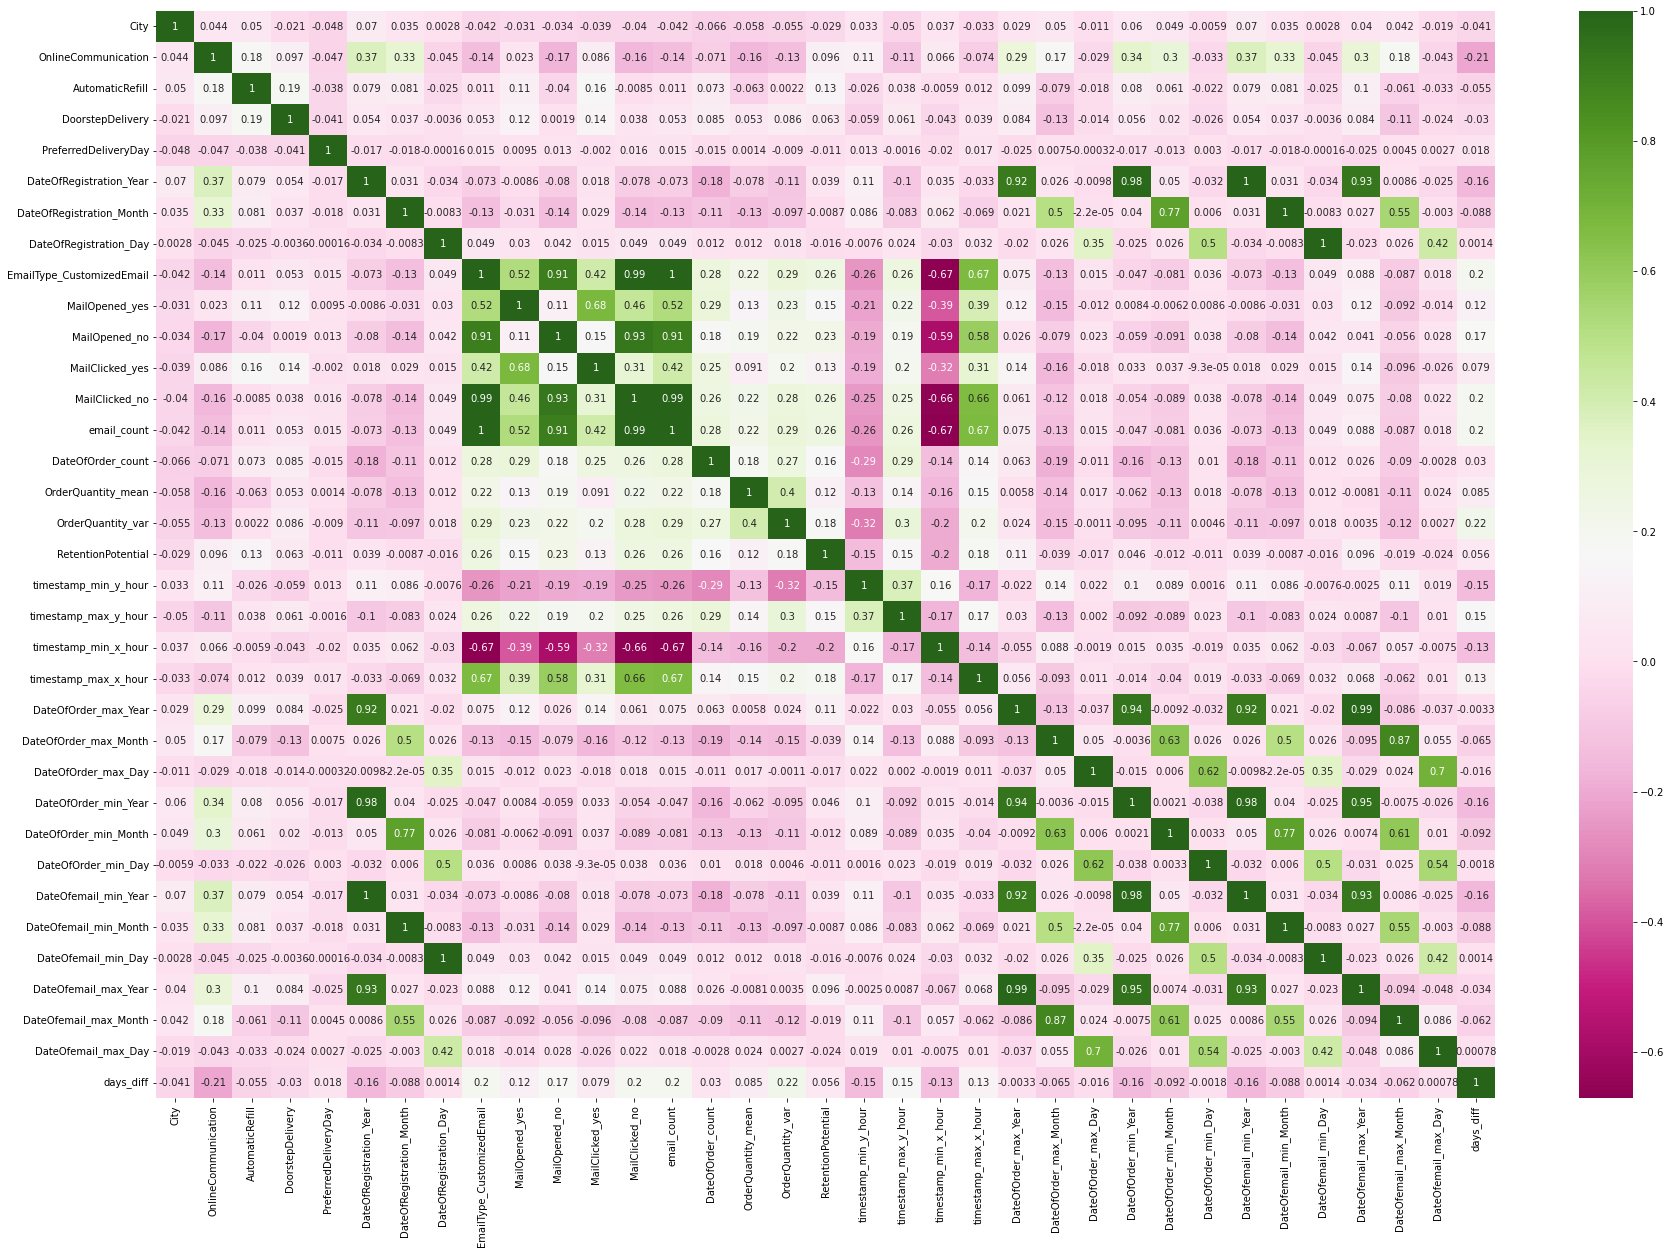

In [315]:
plt.figure(figsize=(30,20))
sns.heatmap(merged_data.corr(), annot=True, cmap='PiYG')

In [316]:
# Find index of feature columns with correlation greater than 0.7
high_corr_cols = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack().sort_values(ascending=False)
                  .where(lambda x: x > 0.9).dropna().reset_index().iloc[:, [0, 1]])

# Get names of highly correlated columns
high_corr_cols = list(set(high_corr_cols.iloc[:, 0]).union(set(high_corr_cols.iloc[:, 1])))

In [317]:
high_corr_cols

['MailOpened_no',
 'MailClicked_no',
 'DateOfemail_min_Month',
 'DateOfemail_min_Day',
 'email_count',
 'DateOfRegistration_Month',
 'DateOfRegistration_Year',
 'EmailType_CustomizedEmail',
 'DateOfOrder_min_Year',
 'DateOfemail_min_Year',
 'DateOfemail_max_Year',
 'DateOfRegistration_Day',
 'DateOfOrder_max_Year']

In [318]:
'''merged_data = merged_data.drop(['MailOpened_no','MailClicked_no','DateOfRegistration_Year','email_count','DateOfemail_max_Year',
                                'DateOfOrder_min_Year','EmailType_CustomizedEmail','DateOfRegistration_Day',
                                'DateOfemail_min_Year','DateOfemail_min_Month','DateOfOrder_max_Year',
                                'DateOfRegistration_Month','DateOfemail_min_Day'], axis=1)'''

"merged_data = merged_data.drop(['MailOpened_no','MailClicked_no','DateOfRegistration_Year','email_count','DateOfemail_max_Year',\n                                'DateOfOrder_min_Year','EmailType_CustomizedEmail','DateOfRegistration_Day',\n                                'DateOfemail_min_Year','DateOfemail_min_Month','DateOfOrder_max_Year',\n                                'DateOfRegistration_Month','DateOfemail_min_Day'], axis=1)"

# Model Building

In [319]:
# Define a function to calculate Gini impurity
def gini_impurity(labels):
    classes = np.unique(labels)
    impurity = 1
    for c in classes:
        p = np.sum(labels == c) / len(labels)
        impurity -= p ** 2
    return impurity

# Define a function to split the data based on a feature and threshold
def split_data(X, y, feature, threshold):
    left_indices = np.where(X[:, feature] <= threshold)[0]           
    right_indices = np.where(X[:, feature] > threshold)[0]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split for a given node
def find_best_split(X, y):
    best_feature, best_threshold, best_impurity = None, None, 1
    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_data(X, y, feature, threshold)
            impurity = (len(y_left) / len(y)) * gini_impurity(y_left) + (len(y_right) / len(y)) * gini_impurity(y_right)
            if impurity < best_impurity:
                best_feature, best_threshold, best_impurity = feature, threshold, impurity
    return best_feature, best_threshold

In [320]:
# Define a class for the decision tree
class Node:
    def __init__(self, X, y, depth, max_depth, min_samples_leaf):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.left = None
        self.right = None
        self.feature = None
        self.threshold = None
        self.label = None

    def split(self):    # Splits the input data and labels into two subsets based on the best feature and threshold 
        self.feature, self.threshold = find_best_split(self.X, self.y)
        X_left, y_left, X_right, y_right = split_data(self.X, self.y, self.feature, self.threshold)
        if len(y_left) > 0 and len(y_right) > 0 and self.depth < self.max_depth:
            self.left = Node(X_left, y_left, self.depth + 1, self.max_depth, min_samples_leaf)
            self.right = Node(X_right, y_right, self.depth + 1, self.max_depth, min_samples_leaf)

    def predict(self, x):  #Given a new data point x, traverses the tree to predict the class label for x.
        if self.label is not None:
            return self.label
        if x[self.feature] <= self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)
            

    def fit(self): #trains the decision tree by recursively splitting the data and labels until the stopping criteria are met.
        if len(np.unique(self.y)) == 1: #If all the elements in the target variable y are the same .This node becomes a leaf node
            self.label = self.y[0]
            return
        if self.depth == self.max_depth:
            self.label = np.bincount(self.y.astype(int)).argmax()  #return the index of the highest count.
            return
        if len(y) < self.min_samples_leaf:
            self.label = np.bincount(self.y.astype(int)).argmax()
            return
        self.split()
        if self.left is not None:
            self.left.fit()
        if self.right is not None:
            self.right.fit()


In [321]:
X = merged_data.drop(['RetentionPotential'], axis=1).values
y = merged_data['RetentionPotential'].values

In [322]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [323]:
# Build the decision tree
min_samples_leaf = 5
tree = Node(X_train, y_train, 0, 10, min_samples_leaf)
tree.fit()

# Define a function to calculate the accuracy of the model
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predict the classes of the test data

y_train_pred = np.array([tree.predict(x) for x in X_train])
y_test_pred = np.array([tree.predict(x) for x in X_test])

# Calculate the accuracy of the model
print('Accuracy-->X_Train Data:', accuracy(y_train, y_train_pred))
print('Accuracy-->X_Test Data:', accuracy(y_test, y_test_pred)) 

Accuracy-->X_Train Data: 0.9128883291351805
Accuracy-->X_Test Data: 0.8939966414777498


In [324]:
# Define a function to calculate recall for a multiclass problem with 3 classes
def recall(y_true, y_pred):
    classes = np.unique(y_true)
    recall_list = []
    for c in classes:
        tp = np.sum((y_true == c) & (y_pred == c))
        fn = np.sum((y_true == c) & (y_pred != c))
        recall = tp / (tp + fn)
        recall_list.append(recall)
    return recall_list

# Calculate the recall of the model
print('Recall-->X_Train Data:', recall(y_train, y_train_pred))

Recall-->X_Train Data: [0.6379080612924717, 0.967315580441435, 0.897841726618705]
